In [102]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
from scipy.integrate import solve_ivp

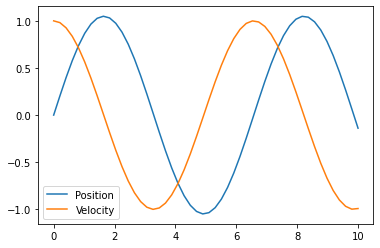

In [177]:
k = 1.
force = lambda t, x, k: [x[1], -k * x[0] + 0.1 * np.sin(x[0])]
solve = lambda t_eval: solve_ivp(force, (0, 100), y0=[0., 1.], args=(k,), t_eval=t_eval)
sol = solve(np.linspace(0, 10))
plt.plot(sol.t, sol.y[0], label='Position')
plt.plot(sol.t, sol.y[1], label='Velocity')
plt.legend()

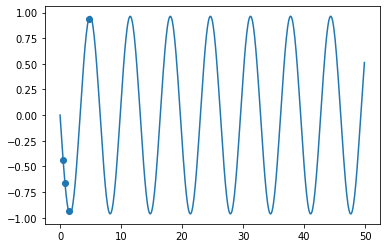

In [212]:
plot_t = np.arange(0, 50, 0.1)
data_plot = solve(plot_t)
positions_plot = data_plot.y[0]
force_plot = force(plot_t, [data_plot.y[0], data_plot.y[1]], k)[1]

t = np.sort(np.random.choice(plot_t[:50], size=4, replace=False))
# t = np.arange(0, 10, 3.29)
dataset = solve(t)
position_data = dataset.y[0]
force_data = force(t, [dataset.y[0], dataset.y[1]], k)[1]

plt.plot(plot_t, force_plot, label='True force')
plt.scatter(t, force_data, label='Force measurements')

In [213]:
NN = nn.Sequential(
    nn.Linear(1, 32),
    nn.Sigmoid(),
    nn.Linear(32, 1),
)

In [214]:
opt = torch.optim.Adam(NN.parameters(), 0.01)
for i in range(2000):
    opt.zero_grad()
    loss = torch.square(
             torch.concat(
               [NN(torch.tensor([position_data[i]]).float()) - torch.tensor([force_data[i]])
                 for i in range(len(force_data))
               ]
             )
           ).sum() + \
           0.5 * torch.square(
             torch.concat(
               [NN(torch.tensor([i])) - (-k * i)
                 for i in 2 * torch.rand(100).float() - 1
               ]
             )
           ).sum()
    loss.backward()
    opt.step()
    if i % 500 == 0:
        print(loss)

tensor(34.8971, dtype=torch.float64, grad_fn=<AddBackward0>)
tensor(0.0179, dtype=torch.float64, grad_fn=<AddBackward0>)
tensor(0.0169, dtype=torch.float64, grad_fn=<AddBackward0>)
tensor(0.0177, dtype=torch.float64, grad_fn=<AddBackward0>)


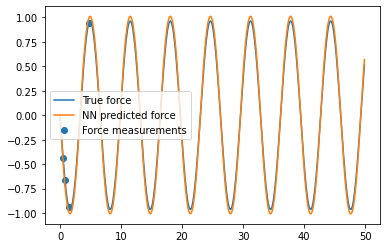

In [215]:
plt.plot(plot_t, force_plot, label='True force')
plt.plot(plot_t, [NN(torch.tensor([i]).float()).item() for i in positions_plot], label='NN predicted force')
plt.scatter(t, force_data, label='Force measurements')
plt.legend()